In [1]:
from google.colab import files
uploaded = files.upload()

Saving clusteringweek06.csv to clusteringweek06.csv


In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [3]:
# Baca file CSV setelah diupload (ganti nama file sesuai dengan file yang diupload)
df = pd.read_csv('clusteringweek06.csv')

# Tampilkan 5 baris pertama
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [4]:
# Melakukan standardisasi data agar fitur berada pada skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Opsional: ubah ke DataFrame untuk visualisasi
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

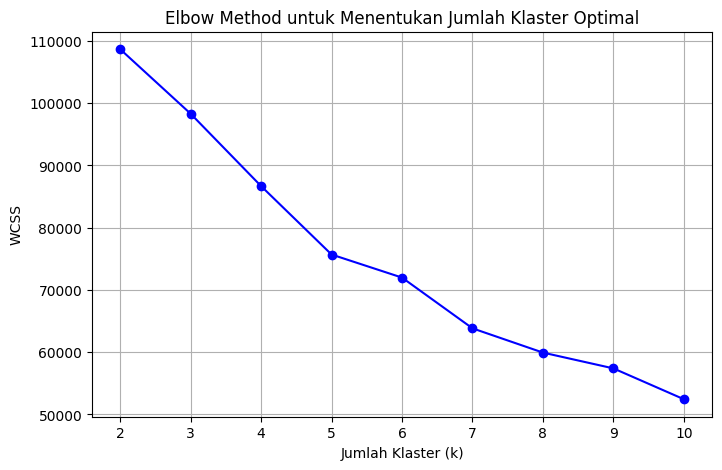

In [5]:
# Menentukan jumlah klaster optimal menggunakan Elbow Method
wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
plt.grid(True)
plt.show()

In [6]:
# Evaluasi berbagai metrik untuk tiap jumlah klaster
results = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)

    results.append((k, silhouette, calinski, davies))

# Tampilkan dalam DataFrame
eval_df = pd.DataFrame(results, columns=['k', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
eval_df

,k,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,2,0.329799,3284.605925,1.308099
1,3,0.333652,2194.578237,1.265539
2,4,0.347980,1980.554475,1.424032
3,5,0.354285,1961.893190,1.347381
4,6,0.341148,1724.140662,1.496576
5,7,0.273265,1773.061289,1.573623
6,8,0.262328,1685.161959,1.498100
7,9,0.262283,1579.170151,1.435096
8,10,0.279716,1611.509887,1.301783


In [7]:
# Gunakan jumlah klaster optimal berdasarkan hasil sebelumnya, misalnya 3
optimal_k = 3  # Sesuaikan setelah melihat hasil eval_df

# Model 1: KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Model 2: Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(X_scaled)

In [8]:
# Evaluasi model KMeans
print("Evaluasi KMeans:")
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))

# Evaluasi model Agglomerative
print("\nEvaluasi Agglomerative:")
print("Silhouette Score:", silhouette_score(X_scaled, agglo_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, agglo_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agglo_labels))

Evaluasi KMeans:
Silhouette Score: 0.3336517041041939
Calinski-Harabasz Index: 2194.5782371896794
Davies-Bouldin Index: 1.2655388064008637

Evaluasi Agglomerative:
Silhouette Score: 0.34917834306499484
Calinski-Harabasz Index: 2329.6291511992745
Davies-Bouldin Index: 1.4567542564065181


# Penjelasan Matematis Metrik Evaluasi Clustering
1. Silhouette Coefficient

Silhouette Coefficient mengukur seberapa baik suatu titik berada dalam klusternya dibandingkan dengan kluster lain. Nilai berkisar antara -1 hingga 1. Semakin mendekati 1, semakin baik pemisahan antar kluster.

Rumus:

$s(i) = (b(i) - a(i)) / max(a(i), b(i))$

Keterangan:

- $i$: Rata-rata jarak antara titik i dan semua titik dalam klusternya.
- $i$: Jarak rata-rata titik i ke titik-titik dalam kluster terdekat selain klusternya sendiri.
- s$i$: Nilai silhouette untuk titik i.

2. Calinski-Harabasz Index

Indeks ini membandingkan variasi antar-kluster terhadap variasi dalam-kluster. Semakin besar nilainya, semakin baik klusterisasi.

Rumus:

$CH = (tr(B_k) / tr(W_k)) * ((n - k) / (k - 1))$

Keterangan:

- $tr(B_k)$: Jejak (trace) matriks antara-kluster (inter-cluster).
- $tr(W_k)$: Jejak (trace) matriks dalam-kluster (intra-cluster).
- $n$: Jumlah total data.
- $k$: Jumlah kluster.

3. Davies-Bouldin Index

Indeks ini mengukur kesamaan antar kluster. Semakin rendah nilainya, semakin baik kualitas klusterisasi.

Rumus:

$DB = (1 / k) * Σ_i=1^k [ max_{j ≠ i} ( (σ_i + σ_j) / d(c_i, c_j) ) ]$

Keterangan:

- $k$: Jumlah kluster.
- $σi$: Rata-rata jarak antar titik dalam kluster i dengan pusat klusternya.
- $d(c_i, c_j)$: Jarak antara pusat kluster i dan j.

Nilai yang lebih rendah menandakan pemisahan antar kluster yang lebih baik.
4. Dunn Index

Dunn Index digunakan untuk menilai pemisahan antar-kluster dan kepadatan dalam kluster. Semakin besar nilainya, semakin baik.

Rumus:

$Dunn = min_{i ≠ j} d(c_i, c_j) / max_k diameter(C_k)$

Keterangan:

- $d(c_i, c_j)$: Jarak antara pusat kluster i dan j.
- $diameter(C_k)$: Jarak maksimum antar titik dalam kluster k.
- Numerator menunjukkan jarak antar kluster terdekat.
- Denominator menunjukkan seberapa tersebar kluster terluas.